# Network Analysis

<img src="https://researchmethods117203719.files.wordpress.com/2018/04/socialnetwork.jpg" />

Network analysis is an unsupervised analysis technique that find relationships (edges) between different entities (nodes). The analysis is based on <b>Graph Theory</b> concepts

In [1]:
library(igraph)
library(dplyr)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union



Attaching package: ‘dplyr’


The following objects are masked from ‘package:igraph’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
### dataset
df <- read.csv(file="https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat")
head(df)

X2B X410 AER X2965 KZN X2990 X X0 CR2
1 2B  410  ASF 2966  KZN 2990    0  CR2
2 2B  410  ASF 2966  MRV 2962    0  CR2
3 2B  410  CEK 2968  KZN 2990    0  CR2
4 2B  410  CEK 2968  OVB 4078    0  CR2
5 2B  410  DME 4029  KZN 2990    0  CR2
6 2B  410  DME 4029  NBC 6969    0  CR2

In [3]:
### companies flight counts
df %>% group_by(X2B) %>% tally() %>% arrange(desc(n)) %>% head(20)

X2B n   
1  FR  2484
2  AA  2354
3  UA  2180
4  DL  1981
5  US  1960
6  CZ  1454
7  MU  1263
8  CA  1260
9  WN  1146
10 U2  1130
11 AF  1071
12 LH   923
13 AZ   877
14 IB   831
15 KL   830
16 ZH   815
17 AB   798
18 FL   726
19 AC   705
20 TK   658

In [28]:
#################################################
### selecting companies
### Small company (2L == Helvetic Airways)
#################################################
df %>% filter(X2B=="UA") %>% tally()

n   
1 2180

In [29]:
df2 <- df %>% filter(X2B=="UA") %>% 
  group_by(AER,KZN) %>% summarise(cnt=n())
flt <- unique(c(levels(factor(df2$AER)),levels(factor(df2$KZN))))

head(df2)

flt
df2$KZN

AER KZN cnt
1 ABE ORD 1  
2 ABJ BRU 1  
3 ABJ LFW 1  
4 ABJ OUA 1  
5 ABQ DEN 1  
6 ABQ IAH 1

[1] "ABE" "ABJ" "ABQ" "ACA" "ACV" "ACY" "ADD" "AEX" "AGU" "AIA" "AKL" "ALA"
 [13] "ALB" "ALS" "AMA" "AMS" "ANC" "ANU" "AOO" "ARN" "ASB" "ASE" "ATL" "ATW"
 [25] "AUA" "AUH" "AUS" "AVL" "AVP" "BAH" "BAQ" "BCN" "BDA" "BDL" "BFD" "BFL"
 [37] "BFS" "BGM" "BHM" "BHX" "BIL" "BIM" "BIS" "BJL" "BJM" "BJX" "BKK" "BKW"
 [49] "BNA" "BOG" "BOI" "BOM" "BON" "BOS" "BQN" "BRO" "BRU" "BTR" "BTV" "BUF"
 [61] "BUR" "BWI" "BZE" "BZN" "CAE" "CAI" "CAK" "CCS" "CDG" "CDR" "CEC" "CHO"
 [73] "CHS" "CIC" "CID" "CKB" "CKY" "CLD" "CLE" "CLL" "CLO" "CLT" "CME" "CMH"
 [85] "CMX" "CNS" "COD" "COO" "COS" "CPH" "CPR" "CRP" "CTG" "CTS" "CUN" "CUU"
 [97] "CVG" "CWA" "CYS" "CZM" "DAL" "DAR" "DAY" "DCA" "DDC" "DEL" "DEN" "DFW"
[109] "DGO" "DIK" "DKR" "DLA" "DLH" "DME" "DOH" "DRO" "DSM" "DTW" "DUB" "DUJ"
[121] "DUS" "DXB" "EAU" "EBB" "EDI" "EGE" "ELH" "ELM" "ELP" "ERI" "EUG" "EVN"
[133] "EWR" "EYW" "EZE" "FAR" "FAT" "FAY" "FCA" "FCO" "FIH" "FKL" "FLL" "FMN"
[145] "FNA" "FNT" "FOE" "FPO" "FRA" "FSD" "FUK" "FWA" "GCC" "GCM" "GDL" "GEG"
[157] "GGT" "GHB" "GIG" "GJT" "GLA" "GNV" "GOT" "GPT" "GRB" "GRK" "GRR" "GRU"
[169] "GSO" "GSP" "GTF" "GUA" "GUC" "GUM" "GVA" "GYD" "HAJ" "HAM" "HDN" "HKG"
[181] "HLN" "HND" "HNL" "HOB" "HON" "HPN" "HRL" "HSV" "HUX" "IAD" "IAH" "ICN"
[193] "ICT" "IDA" "IGM" "IND" "ISN" "ITH" "ITO" "JAC" "JAN" "JAX" "JED" "JFK"
[205] "JHW" "JNB" "JST" "KGL" "KIX" "KOA" "KSA" "KWA" "KWI" "LAD" "LAN" "LAR"
[217] "LAS" "LAX" "LBB" "LBL" "LCH" "LED" "LEX" "LFT" "LFW" "LGA" "LHR" "LIH"
[229] "LIM" "LIR" "LIS" "LIT" "LMT" "LNK" "LOS" "LRD" "LWB" "MAD" "MAF" "MAJ"
[241] "MAN" "MBJ" "MBS" "MCI" "MCO" "MCT" "MDE" "MDT" "MEL" "MEM" "MEX" "MFE"
[253] "MFR" "MGA" "MGW" "MHH" "MHT" "MIA" "MID" "MKE" "MKG" "MLI" "MLM" "MLU"
[265] "MNL" "MOB" "MOD" "MOT" "MRY" "MSN" "MSO" "MSP" "MSY" "MTJ" "MTY" "MUC"
[277] "MXP" "MYR" "NAS" "NBO" "NGO" "NRT" "NSI" "OAX" "OGG" "OKC" "OKJ" "OMA"
[289] "ONT" "ORD" "ORF" "OSL" "OTH" "OUA" "PAH" "PBC" "PBI" "PDX" "PEK" "PGA"
[301] "PHC" "PHL" "PHX" "PIA" "PIR" "PIT" "PKB" "PLS" "PNI" "PNS" "POP" "POS"
[313] "PRG" "PSC" "PSP" "PTY" "PUB" "PUJ" "PVD" "PVG" "PVR" "QRO" "RAP" "RDD"
[325] "RDM" "RDU" "REP" "RIC" "RKS" "RNO" "ROA" "ROB" "ROC" "ROP" "ROR" "RSW"
[337] "RTB" "SAF" "SAL" "SAN" "SAP" "SAT" "SAV" "SBA" "SBN" "SBP" "SCE" "SDF"
[349] "SDJ" "SDQ" "SEA" "SFO" "SGF" "SGN" "SGU" "SHD" "SHV" "SIN" "SJC" "SJD"
[361] "SJO" "SJU" "SLC" "SLP" "SLW" "SMF" "SMX" "SNA" "SNN" "SOW" "SPN" "SRQ"
[373] "STC" "STL" "STR" "STT" "SXM" "SYD" "SYR" "TAM" "TCB" "TGU" "TKK" "TLH"
[385] "TLV" "TPA" "TPE" "TRC" "TRN" "TSE" "TUL" "TUS" "TVC" "TXL" "TYR" "TYS"
[397] "UIO" "UVF" "VER" "VIE" "VPS" "VSA" "WRL" "XNA" "YAP" "YEG" "YHZ" "YLW"
[409] "YMM" "YOW" "YQB" "YQM" "YQR" "YUL" "YUM" "YVR" "YWG" "YXE" "YXU" "YYC"
[421] "YYJ" "YYT" "YYZ" "ZIH" "ZLO" "ZRH" "CRW" "EIS" "PWM" "SPI" "SXB" "TMS"

[1] ORD BRU LFW OUA DEN IAH LAX ORD SFO IAH CEC SFO SMF IAH ORD JED IAH IAH
  [19] CDR LAX SFO TSE CLE EWR IAD ORD DEN FMN DEN IAH EWR IAD IAH ORD DEN ORD
  [37] SEA EWR IAD JST EWR GYD DEN LAX CLE DEN EWR FRA IAD IAH LGA ORD SFO YYZ
  [55] ORD EWR IAD FRA MCT CLE CUN DEN EWR IAD IAH LAX ORD SFO ORD ORD DOH KWI
  [73] MIA EWR EWR IAD ORD YUL YYZ CLE JHW DEN IAH LAX SFO EWR IAD DEN IAH ORD
  [91] BRU EWR DEN FLL DEN DKR NBO IAH LAX NRT IAD SHD CLE DEN EWR IAD IAH ORD
 [109] EWR IAD IAH JFK MIA DEN LAX ORD SFO EWR EWR IAH CLE DEN DUB EWR FRA IAD
 [127] IAH LAX MUC ORD PTY SFO YHZ YOW YUL YYZ ZRH EWR IAH ABJ BHX BJM COO DKR
 [145] DLA EWR FNA GOT HAJ IAD JFK KGL LAD MAN NSI ORD OUA PRG SXB IAH EWR IAD
 [163] ORD CLE EWR IAD ORD DEN SFO CLE DEN EWR IAH LAX ORD SFO EWR IAH DEN ORD
 [181] IAD IAH ORD JFK ORD IAH EWR IAD ORD SFO DEN ACV SFO IAD CLE EWR IAD IAH
 [199] ORD SFO DEN ORD IAD MGW DKR LAX ALB ATL AUS BFD BNA BOS BUF BWI CHS CLT
 [217] CMH CUN DAY DCA DEN DFW DUJ ERI EWR FKL FLL FNT GRR GSP IAD IAH IND JHW
 [235] LAS LAX LGA MCI MCO MKE MSP MSY ORD PBI PHX PKB RIC ROC RSW SDF SFO STL
 [253] SYR TPA YYZ IAH BOG MIA CLE EWR IAD IAH ORD IAH CLE DEN EWR IAD IAH ORD
 [271] YYZ ORD GUM DEN ABJ DEN IAD IAH LAX ORD SFO OSL DEN IAH MIA GUM AUS CLE
 [289] DEN EWR IAD IAH LAX ORD SFO IAH DEN EWR IAD IAH ORD ORD DEN WRL IAH IAH
 [307] NBO CLE DEN EWR IAD ORD CLE DEN EWR IAH ORD SFO DEN LBL EWR ABQ AIA ALS
 [325] AMA ANC ASE ATL AUS BFL BHM BIL BIS BNA BOI BOS BUR BWI BZN CID CLE CMH
 [343] COD COS CPR CUN CVG CYS DAY DCA DFW DIK DRO DSM DTW EGE ELP EUG EWR FAR
 [361] FAT FCA FLL FMN FRA FSD GCC GEG GJT GRR GTF GUC HDN HLN HNL HSV IAD IAH
 [379] ICT IDA IND ISN JAC KOA LAR LAS LAX LBB LGA LIH LIT LNK MAF MCI MCO MEM
 [397] MEX MFR MIA MKE MLI MOT MRY MSN MSO MSP MSY MTJ NRT OGG OKC OMA ONT ORD
 [415] PDX PHL PHX PIA PIR PIT PSC PSP PUB PVR RAP RDM RKS RNO RSW SAF SAN SAT
 [433] SBA SDF SEA SFO SGF SGU SHV SJC SJD SLC SMF SNA STL TPA TUL TUS TYS XNA
 [451] YEG YMM YQR YUL YVR YWG YXE YYC YYZ CLE DEN EWR FRA IAD IAH LAX ORD SAL
 [469] SFO YYZ IAH LAX DEN BJL BRU CKY IAD JNB BRU FIH NSI ORD VIE BAH DXB FRA
 [487] DEN DEN EWR IAH ORD DEN EWR FRA IAD IAH ORD YYZ BOS EWR IAD JFK ORD CLE
 [505] FKL EWR ORD DOH IAD ORD BRU BRU EWR DEN FLL PBI ORD DEN IAH CLE DEN PDX
 [523] SFO VIE ALB AMS ANU ARN ATL AUA AUS BCN BDA BFS BHX BNA BOG BOM BON BOS
 [541] BQN BRU BTV BUF BWI BZE CDG CHS CLE CLT CMH CUN CVG DAY DCA DEL DEN DFW
 [559] DSM DTW DUB DUS EDI FCO FLL FRA GCM GLA GRR GRU GSO GSP GUA GVA HAM HKG
 [577] HNL IAD IAH IND ITH JAX LAS LAX LHR LIM LIR LIS MAD MAN MBJ MCI MCO MEM
 [595] MEX MHT MIA MKE MSN MSP MSY MUC MXP MYR NAS NRT OKC OMA ORD ORF OSL PBI
 [613] PDX PEK PHX PIT PLS POP POS PTY PUJ PVD PVG PVR PWM RDU RIC ROC RSW SAL
 [631] SAN SAP SAT SAV SDF SDQ SEA SFO SJD SJO SJU SNA SNN STL STR STT SXM SYR
 [649] TLV TPA TUL TXL TYS UVF XNA YEG YHZ YOW YQB YQM YUL YVR YYT YYZ ZRH FLL
 [667] RSW TPA IAH DEN ORD DEN LAS LAX SFO IAD DEN EWR IAD BRU DLA CLE DUJ BIM
 [685] CLE DEN ELH EWR EYW FPO GGT GHB IAD IAH MCO MHH ORD SFO TCB TPA ALS DEN
 [703] SOW ROB CLE ORD FLL ATL AUH BOS DEN DFW DOH DTW EWR GYD IAD IAH JED JFK
 [721] LAX LOS MCO MIA ORD SEA SFO TSE DEN ORD GUM ORD DEN EWR IAD IAH IAH LAX
 [739] SFO DEN FLL GHB FLL GRU IAH DEN IAH EWR MCO TPA ARN IAH ORD IAH CLE DEN
 [757] EWR IAD IAH ORD EWR GIG IAD IAH ORD EWR IAD ORD CLE EWR IAD IAH ORD DEN
 [775] EWR IAD IAH MIA DEN CNS CTS FUK HKG HNL KIX MNL NGO NRT OKJ ROP ROR SDJ
 [793] SPN TKK YAP EWR IAD JFK YUL ASB FRA BRU EWR DEN EWR GUM ORD SFO SGN SIN
 [811] DEN HNL LAX AKL DEN EWR GUM HND IAD IAH LAX LIH MAJ NRT OGG ORD PEK SFO
 [829] IAH PIR ORD IAH DEN IAD IAH ORD IAH ALB AMS AOO ATL AUA AUS BDL BGM BKW
 [847] BNA BOG BOS BRU BTV BUF CAE CDG CHO CHS CLE CLT CMH COS CRW CUN CVG DAY
 [865] DEN DFW DKR DTW DUB DXB EWR FAY FCO FLL FRA GCM GRR GRU GSO GSP GUA GVA
 [883] HNL HSV IAH IND JAX JFK JST KWI LAS LAX LGA LHR LWB MAN MBJ MCI MCO MDT
 [901] MEX MGW MIA MSP MSY MUC NRT OKC OMA ORD ORF PD

In [30]:
flt <- unique(c(levels(factor(df2$AER)),levels(factor(df2$KZN))))

flt

[1] "ABE" "ABJ" "ABQ" "ACA" "ACV" "ACY" "ADD" "AEX" "AGU" "AIA" "AKL" "ALA"
 [13] "ALB" "ALS" "AMA" "AMS" "ANC" "ANU" "AOO" "ARN" "ASB" "ASE" "ATL" "ATW"
 [25] "AUA" "AUH" "AUS" "AVL" "AVP" "BAH" "BAQ" "BCN" "BDA" "BDL" "BFD" "BFL"
 [37] "BFS" "BGM" "BHM" "BHX" "BIL" "BIM" "BIS" "BJL" "BJM" "BJX" "BKK" "BKW"
 [49] "BNA" "BOG" "BOI" "BOM" "BON" "BOS" "BQN" "BRO" "BRU" "BTR" "BTV" "BUF"
 [61] "BUR" "BWI" "BZE" "BZN" "CAE" "CAI" "CAK" "CCS" "CDG" "CDR" "CEC" "CHO"
 [73] "CHS" "CIC" "CID" "CKB" "CKY" "CLD" "CLE" "CLL" "CLO" "CLT" "CME" "CMH"
 [85] "CMX" "CNS" "COD" "COO" "COS" "CPH" "CPR" "CRP" "CTG" "CTS" "CUN" "CUU"
 [97] "CVG" "CWA" "CYS" "CZM" "DAL" "DAR" "DAY" "DCA" "DDC" "DEL" "DEN" "DFW"
[109] "DGO" "DIK" "DKR" "DLA" "DLH" "DME" "DOH" "DRO" "DSM" "DTW" "DUB" "DUJ"
[121] "DUS" "DXB" "EAU" "EBB" "EDI" "EGE" "ELH" "ELM" "ELP" "ERI" "EUG" "EVN"
[133] "EWR" "EYW" "EZE" "FAR" "FAT" "FAY" "FCA" "FCO" "FIH" "FKL" "FLL" "FMN"
[145] "FNA" "FNT" "FOE" "FPO" "FRA" "FSD" "FUK" "FWA" "GCC" "GCM" "GDL" "GEG"
[157] "GGT" "GHB" "GIG" "GJT" "GLA" "GNV" "GOT" "GPT" "GRB" "GRK" "GRR" "GRU"
[169] "GSO" "GSP" "GTF" "GUA" "GUC" "GUM" "GVA" "GYD" "HAJ" "HAM" "HDN" "HKG"
[181] "HLN" "HND" "HNL" "HOB" "HON" "HPN" "HRL" "HSV" "HUX" "IAD" "IAH" "ICN"
[193] "ICT" "IDA" "IGM" "IND" "ISN" "ITH" "ITO" "JAC" "JAN" "JAX" "JED" "JFK"
[205] "JHW" "JNB" "JST" "KGL" "KIX" "KOA" "KSA" "KWA" "KWI" "LAD" "LAN" "LAR"
[217] "LAS" "LAX" "LBB" "LBL" "LCH" "LED" "LEX" "LFT" "LFW" "LGA" "LHR" "LIH"
[229] "LIM" "LIR" "LIS" "LIT" "LMT" "LNK" "LOS" "LRD" "LWB" "MAD" "MAF" "MAJ"
[241] "MAN" "MBJ" "MBS" "MCI" "MCO" "MCT" "MDE" "MDT" "MEL" "MEM" "MEX" "MFE"
[253] "MFR" "MGA" "MGW" "MHH" "MHT" "MIA" "MID" "MKE" "MKG" "MLI" "MLM" "MLU"
[265] "MNL" "MOB" "MOD" "MOT" "MRY" "MSN" "MSO" "MSP" "MSY" "MTJ" "MTY" "MUC"
[277] "MXP" "MYR" "NAS" "NBO" "NGO" "NRT" "NSI" "OAX" "OGG" "OKC" "OKJ" "OMA"
[289] "ONT" "ORD" "ORF" "OSL" "OTH" "OUA" "PAH" "PBC" "PBI" "PDX" "PEK" "PGA"
[301] "PHC" "PHL" "PHX" "PIA" "PIR" "PIT" "PKB" "PLS" "PNI" "PNS" "POP" "POS"
[313] "PRG" "PSC" "PSP" "PTY" "PUB" "PUJ" "PVD" "PVG" "PVR" "QRO" "RAP" "RDD"
[325] "RDM" "RDU" "REP" "RIC" "RKS" "RNO" "ROA" "ROB" "ROC" "ROP" "ROR" "RSW"
[337] "RTB" "SAF" "SAL" "SAN" "SAP" "SAT" "SAV" "SBA" "SBN" "SBP" "SCE" "SDF"
[349] "SDJ" "SDQ" "SEA" "SFO" "SGF" "SGN" "SGU" "SHD" "SHV" "SIN" "SJC" "SJD"
[361] "SJO" "SJU" "SLC" "SLP" "SLW" "SMF" "SMX" "SNA" "SNN" "SOW" "SPN" "SRQ"
[373] "STC" "STL" "STR" "STT" "SXM" "SYD" "SYR" "TAM" "TCB" "TGU" "TKK" "TLH"
[385] "TLV" "TPA" "TPE" "TRC" "TRN" "TSE" "TUL" "TUS" "TVC" "TXL" "TYR" "TYS"
[397] "UIO" "UVF" "VER" "VIE" "VPS" "VSA" "WRL" "XNA" "YAP" "YEG" "YHZ" "YLW"
[409] "YMM" "YOW" "YQB" "YQM" "YQR" "YUL" "YUM" "YVR" "YWG" "YXE" "YXU" "YYC"
[421] "YYJ" "YYT" "YYZ" "ZIH" "ZLO" "ZRH" "CRW" "EIS" "PWM" "SPI" "SXB" "TMS"

In [31]:
mtx <- Matrix::Matrix(NA,nrow=length(flt),ncol =length(flt))

### iterate through the matrix
for(i in 1:length(flt)) {
  #res <- NULL
  for(j in 1:length(flt)) {
    if(is.na(as.numeric(df2[which(df2$AER==flt[i] & df2$KZN==flt[j]),"cnt"]))==F) {
      mtx[i,j] <- as.numeric(df2[which(df2$AER==flt[i] & df2$KZN==flt[j]),"cnt"])
    }
  }
}
mtx


432 x 432 Matrix of class "dgeMatrix"
       [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13]
  [1,]   NA   NA   NA   NA   NA   NA   NA   NA   NA    NA    NA    NA    NA
  [2,]   NA   NA   NA   NA   NA   NA   NA   NA   NA    NA    NA    NA    NA
  [3,]   NA   NA   NA   NA   NA   NA   NA   NA   NA    NA    NA    NA    NA
  [4,]   NA   NA   NA   NA   NA   NA   NA   NA   NA    NA    NA    NA    NA
  [5,]   NA   NA   NA   NA   NA   NA   NA   NA   NA    NA    NA    NA    NA
  [6,]   NA   NA   NA   NA   NA   NA   NA   NA   NA    NA    NA    NA    NA
  [7,]   NA   NA   NA   NA   NA   NA   NA   NA   NA    NA    NA    NA    NA
  [8,]   NA   NA   NA   NA   NA   NA   NA   NA   NA    NA    NA    NA    NA
  [9,]   NA   NA   NA   NA   NA   NA   NA   NA   NA    NA    NA    NA    NA
 [10,]   NA   NA   NA   NA   NA   NA   NA   NA   NA    NA    NA    NA    NA
 [11,]   NA   NA   NA   NA   NA   NA   NA   NA   NA    NA    NA    NA    NA
 [12,]   NA   NA   NA   NA   NA   NA   NA   NA   N

In [32]:
links <- as.matrix(mtx)


In [33]:
mynet <- graph.adjacency(links, mode="directed",weighted=NULL)


In [34]:
### network size by edges (Y axis is Source and X is the Target)
E(mynet)

+ 2180/2180 edges from 276204f:
 [1]  1->290  2-> 57  2->225  2->294  3->107  3->191  3->218  3->290  3->352
[10]  4->191  5-> 71  5->352  5->366  6->191  6->290  7->203  8->191  9->191
[19] 10-> 70 11->218 11->352 12->390 13-> 79 13->133 13->190 13->290 14->107
[28] 14->144 15->107 15->191 16->133 16->190 16->191 16->290 17->107 17->290
[37] 17->351 18->133 19->190 19->207 20->133 21->176 22->107 22->218 23-> 79
[46] 23->107 23->133 23->149 23->190 23->191 23->226 23->290 23->352 23->423
[55] 24->290 25->133 25->190 26->149 26->246 27-> 79 27-> 95 27->107 27->133
[64] 27->190 27->191 27->218 27->290 27->352 28->290 29->290 30->115 30->213
[73] 31->258 32->133 33->133 34->190 34->290 34->414 34->423 35-> 79 35->205
[82] 36->107 36->191 36->218 36->352 37->133 38->190 39->107 39->191 39->290
+ ... omitted several edges

In [35]:
### network size by vertices (nodes)
V(mynet)

+ 432/432 vertices, from 276204f:
  [1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
 [19]  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
 [37]  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
 [55]  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
 [73]  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
 [91]  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
[109] 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
[127] 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
[145] 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
[163] 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
+ ... omitted several vertices

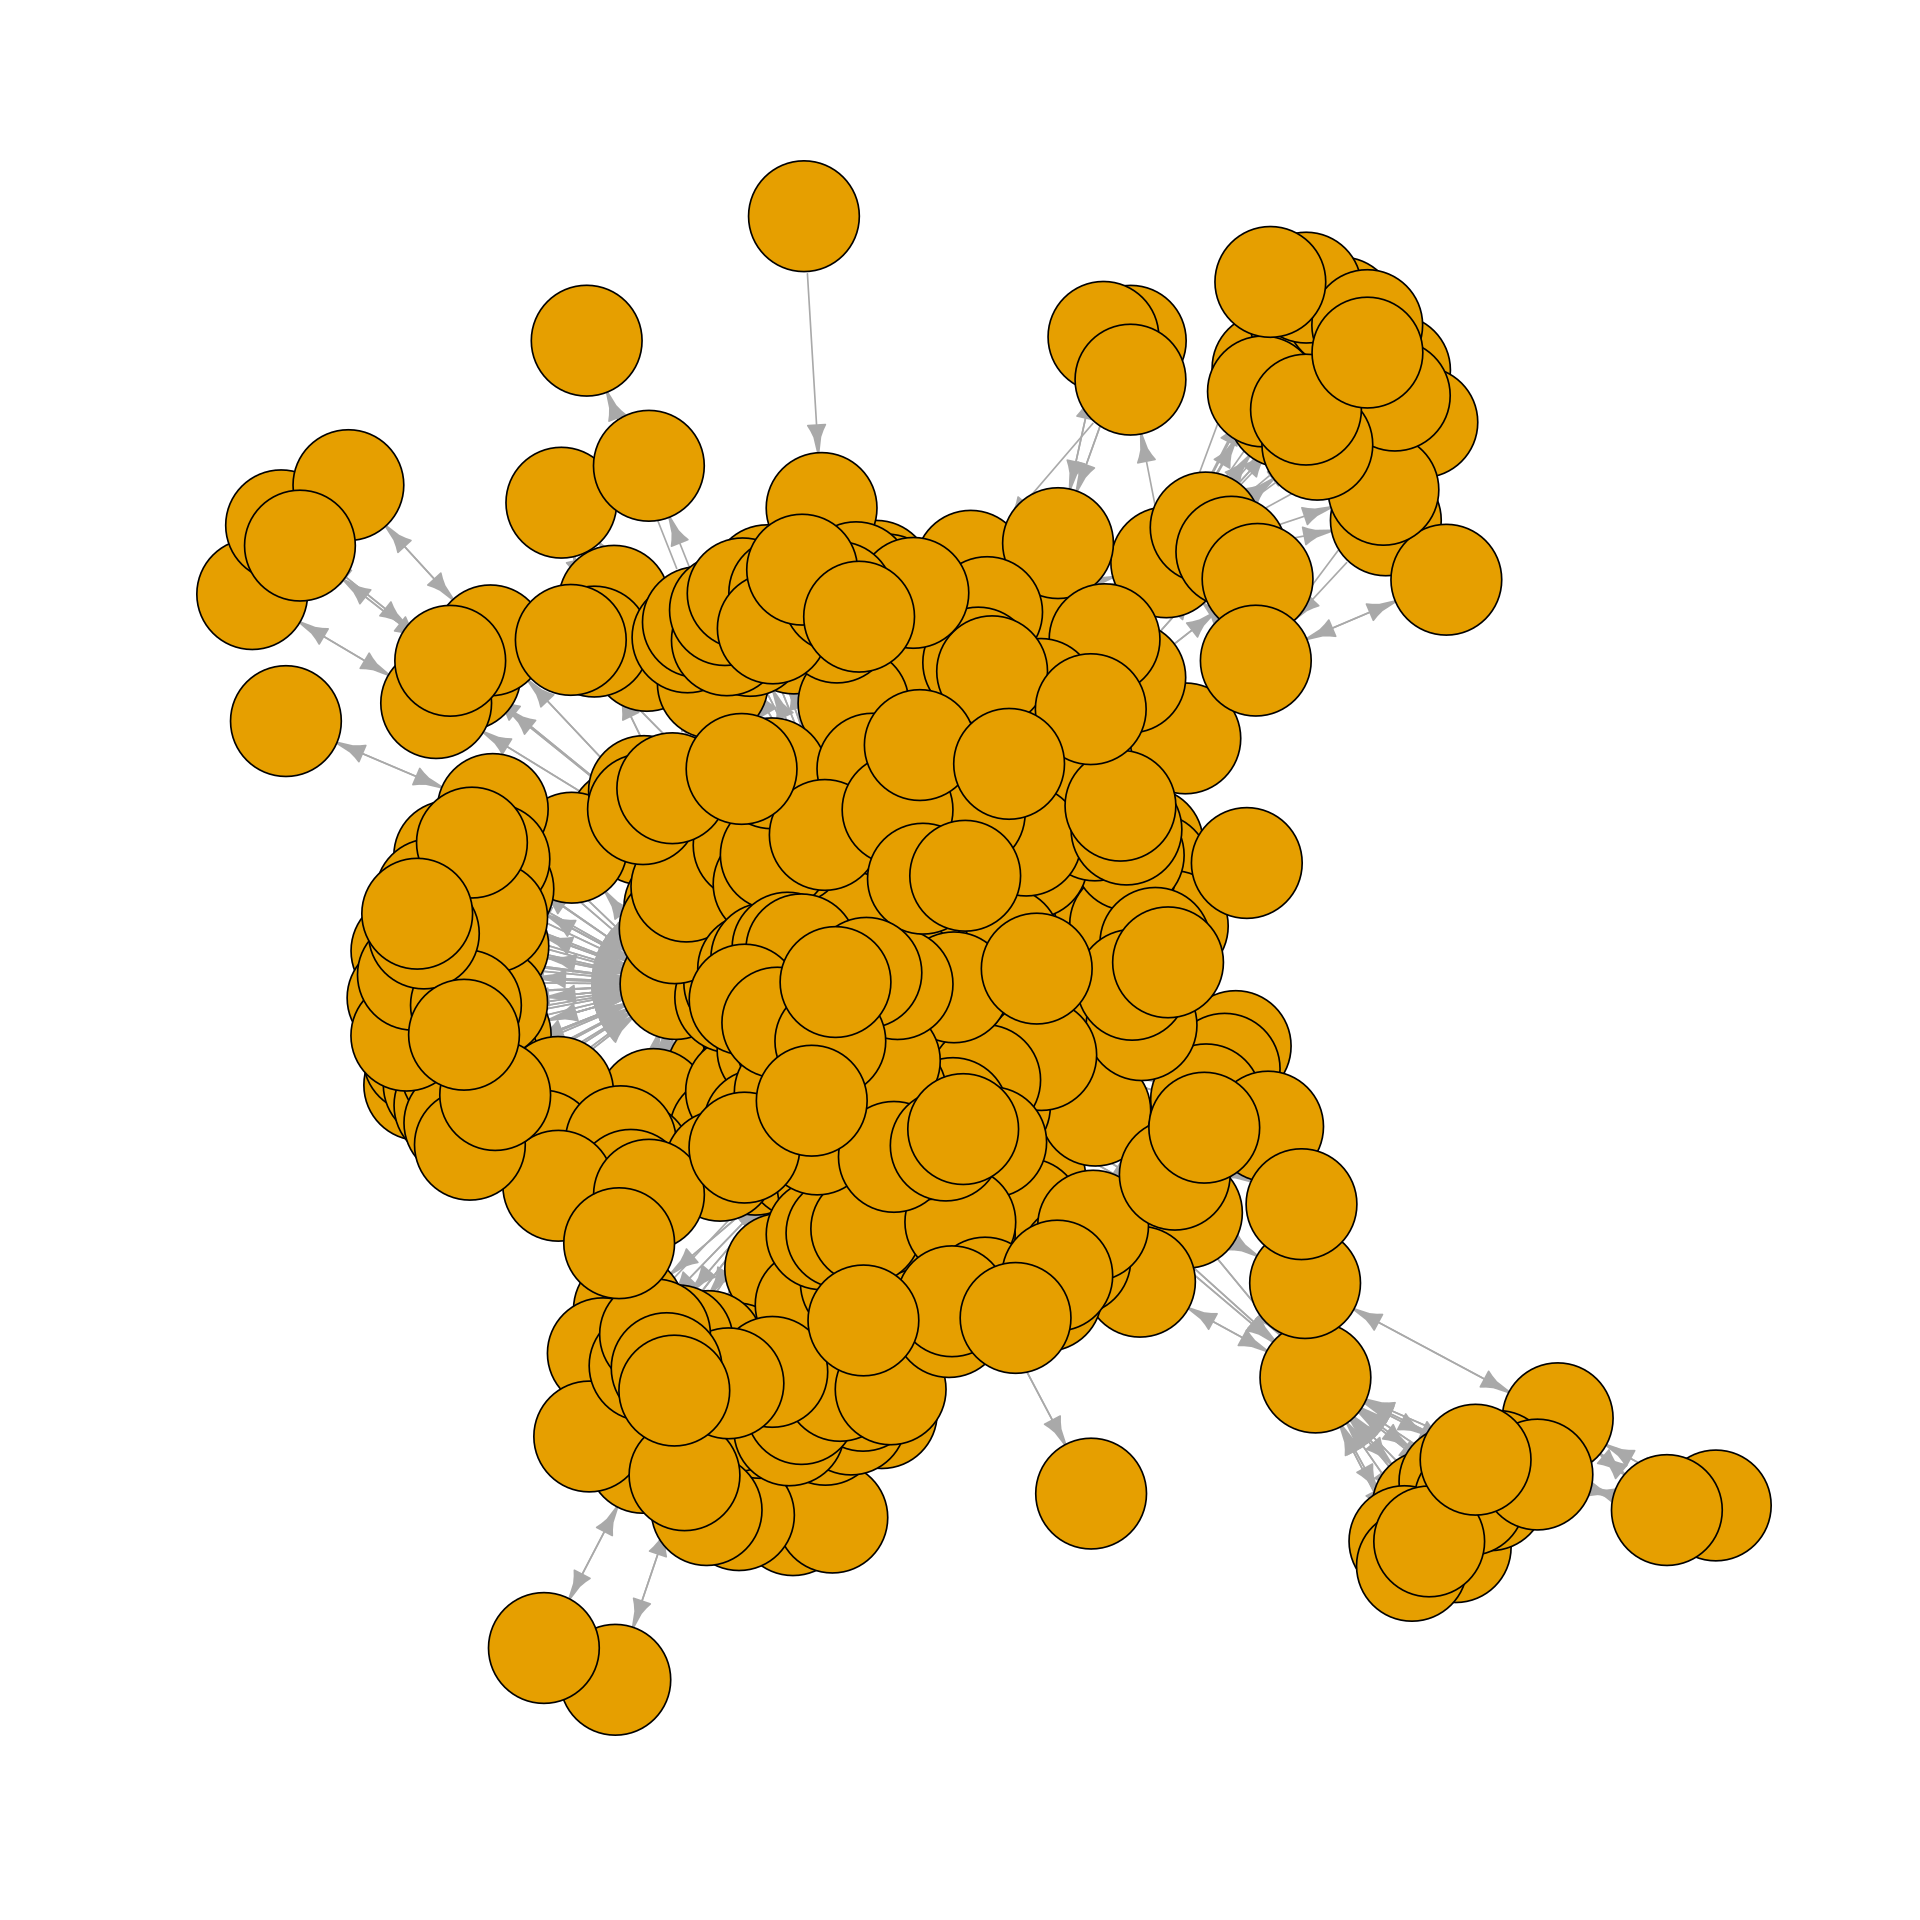

In [36]:
options(repr.plot.width = 16, repr.plot.height = 16)

plot(mynet, edge.arrow.size=.4, vertex.label=NA)

### Measures

In [37]:
mean_distance(mynet, directed=F)

[1] 2.782848

In [38]:
diameter(mynet, directed=F,weights=NA)

[1] 7

In [39]:
centr_degree(mynet,mode="in",normalized=T)

$res
  [1]   1   3   5   1   3   2   1   1   1   1   3   1   4   2   2   4   3   1
 [19]   2   2   1   2   9   1   2   2   9   1   1   2   1   1   1   4   2   4
 [37]   1   1   3   2   1   1   1   1   1   2   1   1   6   6   4   1   2  17
 [55]   1   1  19   1   3   4   2   7   2   2   3   1   1   1   4   1   2   1
 [73]   5   1   2   1   1   1  49   1   1   5   1   7   1   1   1   1   6   0
 [91]   1   1   1   1   9   1   5   1   2   1   1   1   5   6   1   1 141  11
[109]   2   1   5   3   1   1   3   1   4   7   5   2   2   2   1   1   1   1
[127]   2   1   2   1   3   1 140   3   1   2   4   1   1   2   2   2  17   3
[145]   1   1   1   1  21   2   1   1   1   3   3   1   1   2   2   2   1   2
[163]   1   1   1   1   6   5   3   5   1   4   1  16   4   2   1   1   1   6
[181]   1   2  14   1   1   1   1   4   1 107 161   6   4   1   1   7   1   1
[199]   1   1   2   6   2  18   2   2   2   1   2   3   2   3   2   1   1   1
[217]  11  71   2   1   1   1   2   1   1   9   6   4   3   2   2   3   2   2
[235]   3   1   1   1   2   2   3   3   1   7  16   1   1   2   1   4   7   1
[253]   2   1   2   4   2  18   1   5   1   2   1   1   2   2   1   1   3   3
[271]   1   9   9   1   2   8   1   2   3   4   1  15   2   1   5   7   1   5
[289]   3 158   4   2   1   2   1   1   6  13   8   1   1   6   9   2   2   8
[307]   1   1   3   4   1   2   1   2   5  10   1   3   3   4   6   1   2   1
[325]   3   5   1   5   1   3   2   1   4   2   3   7   1   1   7   7   3   7
[343]   4   3   1   2   2   6   1   1  13  88   2   1   1   2   2   2   4   6
[361]   4   5   5   1   1   7   1   5   1   2   2   1   1   8   1   3   3   3
[379]   4   1   1   1   2   2   1  13   1   1   0   2   5   4   1   1   1   5
[397]   1   1   1   6   1   1   1   4   2   5   3   1   1   5   2   1   2  12
[415]   1   8   2   2   1   5   1   1  21   1   1   9   3   1   3   1   1   1

$centralization
[1] 0.3618415

$theoretical_max
[1] 186192

In [40]:
edge_density(mynet,loops=F)

[1] 0.01170834

In [41]:
degree(mynet)

[1]   2   6  10   2   6   4   2   2   2   2   5   2   8   4   4   8   6   2
 [19]   4   3   2   4  19   2   4   4  18   2   2   4   2   2   2   8   4   8
 [37]   2   2   6   4   2   2   2   2   2   4   2   3  12  11   8   2   4  34
 [55]   2   2  39   2   6   8   4  14   4   4   6   2   2   2   8   2   4   2
 [73]  10   2   4   3   2   2  98   2   3  10   2  14   2   2   2   2  12   1
 [91]   2   2   2   2  18   2  10   2   4   2   2   2  10  12   3   2 279  22
[109]   4   2  10   6   2   2   6   2   8  14  10   4   4   4   2   2   3   2
[127]   4   2   4   2   6   2 281   6   2   4   8   2   2   4   4   4  34   6
[145]   2   2   2   2  42   4   2   2   2   6   6   2   3   3   4   4   2   4
[163]   2   2   2   2  12  10   6  10   2   8   2  32   8   4   2   2   2  12
[181]   2   4  29   2   2   2   2   8   2 217 323  12   8   2   2  14   2   2
[199]   2   2   4  12   4  36   4   4   4   3   4   6   4   6   4   2   2   2
[217]  22 143   4   3   2   2   4   2   2  17  12   8   6   4   5   6   4   4
[235]   6   2   2   2   4   4   4   6   2  14  32   2   2   4   2   8  14   2
[253]   4   2   4   8   4  36   2  10   2   4   2   2   4   4   2   2   6   6
[271]   2  18  18   2   4  16   2   4   6   7   2  30   4   2  10  14   2   9
[289]   6 319   8   3   2   4   2   2  12  26  16   2   2  12  18   4   4  16
[307]   2   2   6   8   2   4   2   4  10  20   2   6   6   8  12   2   4   2
[325]   6  10   2  10   2   6   4   2   8   4   6  14   2   2  14  14   6  14
[343]   8   6   2   4   4  12   2   2  26 176   4   2   2   3   4   4   8  12
[361]   8  10  10   2   2  14   2  10   2   4   4   2   2  16   2   7   6   6
[379]   8   2   2   2   4   4   2  26   2   2   1   4  10   8   2   2   2  10
[397]   2   2   2  12   2   2   2   8   4  10   6   2   2  10   4   2   4  24
[415]   2  16   4   4   2  10   2   2  42   2   2  18   3   1   3   1   1   1

In [42]:
mean(degree(mynet))

[1] 10.09259

### Clusters

In [43]:
cliques(mynet)

Warning message in cliques(mynet):
“At igraph_cliquer.c:56 :Edge directions are ignored for clique calculations”


[[1]]
+ 1/432 vertex, from 276204f:
[1] 191

[[2]]
+ 1/432 vertex, from 276204f:
[1] 57

[[3]]
+ 1/432 vertex, from 276204f:
[1] 174

[[4]]
+ 1/432 vertex, from 276204f:
[1] 426

[[5]]
+ 1/432 vertex, from 276204f:
[1] 400

[[6]]
+ 1/432 vertex, from 276204f:
[1] 192

[[7]]
+ 1/432 vertex, from 276204f:
[1] 410

[[8]]
+ 1/432 vertex, from 276204f:
[1] 285

[[9]]
+ 1/432 vertex, from 276204f:
[1] 119

[[10]]
+ 1/432 vertex, from 276204f:
[1] 103

[[11]]
+ 1/432 vertex, from 276204f:
[1] 379

[[12]]
+ 1/432 vertex, from 276204f:
[1] 376

[[13]]
+ 1/432 vertex, from 276204f:
[1] 333

[[14]]
+ 1/432 vertex, from 276204f:
[1] 320

[[15]]
+ 1/432 vertex, from 276204f:
[1] 256

[[16]]
+ 1/432 vertex, from 276204f:
[1] 228

[[17]]
+ 1/432 vertex, from 276204f:
[1] 175

[[18]]
+ 1/432 vertex, from 276204f:
[1] 137

[[19]]
+ 1/432 vertex, from 276204f:
[1] 69

[[20]]
+ 1/432 vertex, from 276204f:
[1] 60

[[21]]
+ 1/432 vertex, from 276204f:
[1] 51

[[22]]
+ 1/432 vertex, from 276204f:
[1] 34

[[

In [44]:
sapply(cliques(mynet), length)

Warning message in cliques(mynet):
“At igraph_cliquer.c:56 :Edge directions are ignored for clique calculations”


[1]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
   [25]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
   [49]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
   [73]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
   [97]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  [121]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  [145]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  [169]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  [193]  1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  2
  [217]  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  [241]  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  [265]  2  2  2  2  2  2  2  2  2  1  2  2  2  2  2  2  2  2  1  2  1  2  1  2
  [289]  1  2  2  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  2  2  1  2  1  2
  [313]  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2
  [337]  2  1  2  1  2  1  2  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2
  [361]  1  2  1  2  1  2  2  2  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1
  [385]  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1
  [409]  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  2  1  2  1  2  1  2  1  2
  [433]  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2
  [457]  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2
  [481]  1  2  1  2  1  2  1  2  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1
  [505]  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  1  2  2  1  2  1  2
  [529]  1  2  1  2  1  2  1  2  1  2  3  2  3  2  3  2  3  2  3  2  3  2  3  2
  [553]  3  2  3  2  3  2  3  2  3  2  3  2  3  3  3  3  3  3  3  3  3  3  3  3
  [577]  3  3  3  3  3  3  3  3  3  3  3  3  3  2  2  2  2  2  2  2  2  2  2  2
  [601]  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  [625]  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  1  2  3  3  2  2
  [649]  1  2  3  2  2  1  2  3  2  1  2  3  2  1  2  3  2  1  2  3  2  1  2  3
  [673]  2  1  2  3  2  1  2  3  2  1  2  3  2  1  2  3  2  1  2  3  2  1  2  3
  [697]  2  1  2  3  2  1  2  3  2  1  2  3  2  1  2  3  2  1  2  3  2  1  2  3
  [721]  2  1  2  3  2  1  2  3  2  1  2  3  2  1  2  3  2  1  2  3  2  1  2  3
  [745]  2  3  2  1  2  3  2  1  2  3  2  1  2  3  2  3  2  1  2  3  2  1  2  3
  [769]  2  1  2  3  2  1  2  3  4  3  2  3  4  3  2  3  4  3  2  3  4  3  2  3
  [793]  4  3  2  3  4  3  2  3  4  4  3  3  2  3  4  3  4  3  4  3  4  3  4  4
  [817]  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  3  3  3  3  3  3  3  3
  [841]  3  3  3  3  3  3  3  3  3  3  3  3  3  2  3  2  3  2  3  2  3  2  2  3
  [865]  2  3  2  3  2  3  2  3  3  3  3  3  2  3  3  3  3  3  3  3  3  3  3  3
  [889]  3  3  3  3  3  3  3  3  3  3  3  3  2  2  2  2  2  2  2  2  2  2  2  2
  [913]  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  1  2
  [937]  3  4  3  2  3  2  1  2  3  2  2  1  2  3  4  3  2  3  2  1  2  3  4  3
  [961]  2  3  2  1  2  3  4  3  2  3  2  2  1  2  3  4  3  2  3  2  1  2  3  4
  [985]  3  2  3  2  1  2  3  4  3  2  3  2  1  2  3  4  3  2  3  2  1  2  3  4
 [1009]  3  2  3  2  1  2  3  4  3  2  3  2  1  2  3  4  3  2  3  2  1  2  3  2
 [1033]  2  2  2  1  2  3  4  3  2  3  2  1  2  3  4  3  2  3  2  1  2  3  4  5
 [1057]  4  3  4  3  2  3  4  5  4  3  4  3  2  3  4  5  4  3  4  3  2  3  4  5
 [1081]  4  3  4  3  2  3  4  5  4  3  4  3  2  3  4  5  4  3  4  3  2  3  4  5
 [1105]  4  3  4  3  2  3  4  5  4  3  4  3  2  3  4  5  4  3  4  3  2  3  4  5
 [1129]  4  3  4  3  2  3  4  5  4  3  4  3  2  3  4  5  4  3  4  3  2  3  4  5
 [1153]  4  3  4  5  4  3  4  5  4  3  4  5  4  3  4  5  4  3  4  5  5  4  4  3
 [1177]  4  4  3  3  2  3  4  3  2  3  4  3  2  3  4  3  2  3  4  3  2  3  4  3
 [12

In [45]:
largest_cliques(mynet)

Warning message in largest_cliques(mynet):
“At cliques.c:1087 :directionality of edges is ignored for directed graphs”


[[1]]
+ 10/432 vertices, from 276204f:
 [1] 191 290 133 190 107 352 218 414  54 423

[[2]]
+ 10/432 vertices, from 276204f:
 [1] 191 290 133 190 107 352 218  79 423 273

[[3]]
+ 10/432 vertices, from 276204f:
 [1] 191 290 133 190 107 352 218  79 423 272

[[4]]
+ 10/432 vertices, from 276204f:
 [1] 191 290 133 190 107 352 218  79 423 108

[[5]]
+ 10/432 vertices, from 276204f:
 [1] 191 290 133 190 107 352 218  79 423  54

[[6]]
+ 10/432 vertices, from 276204f:
 [1] 191 290 133 190 107 352 218  79  95  27


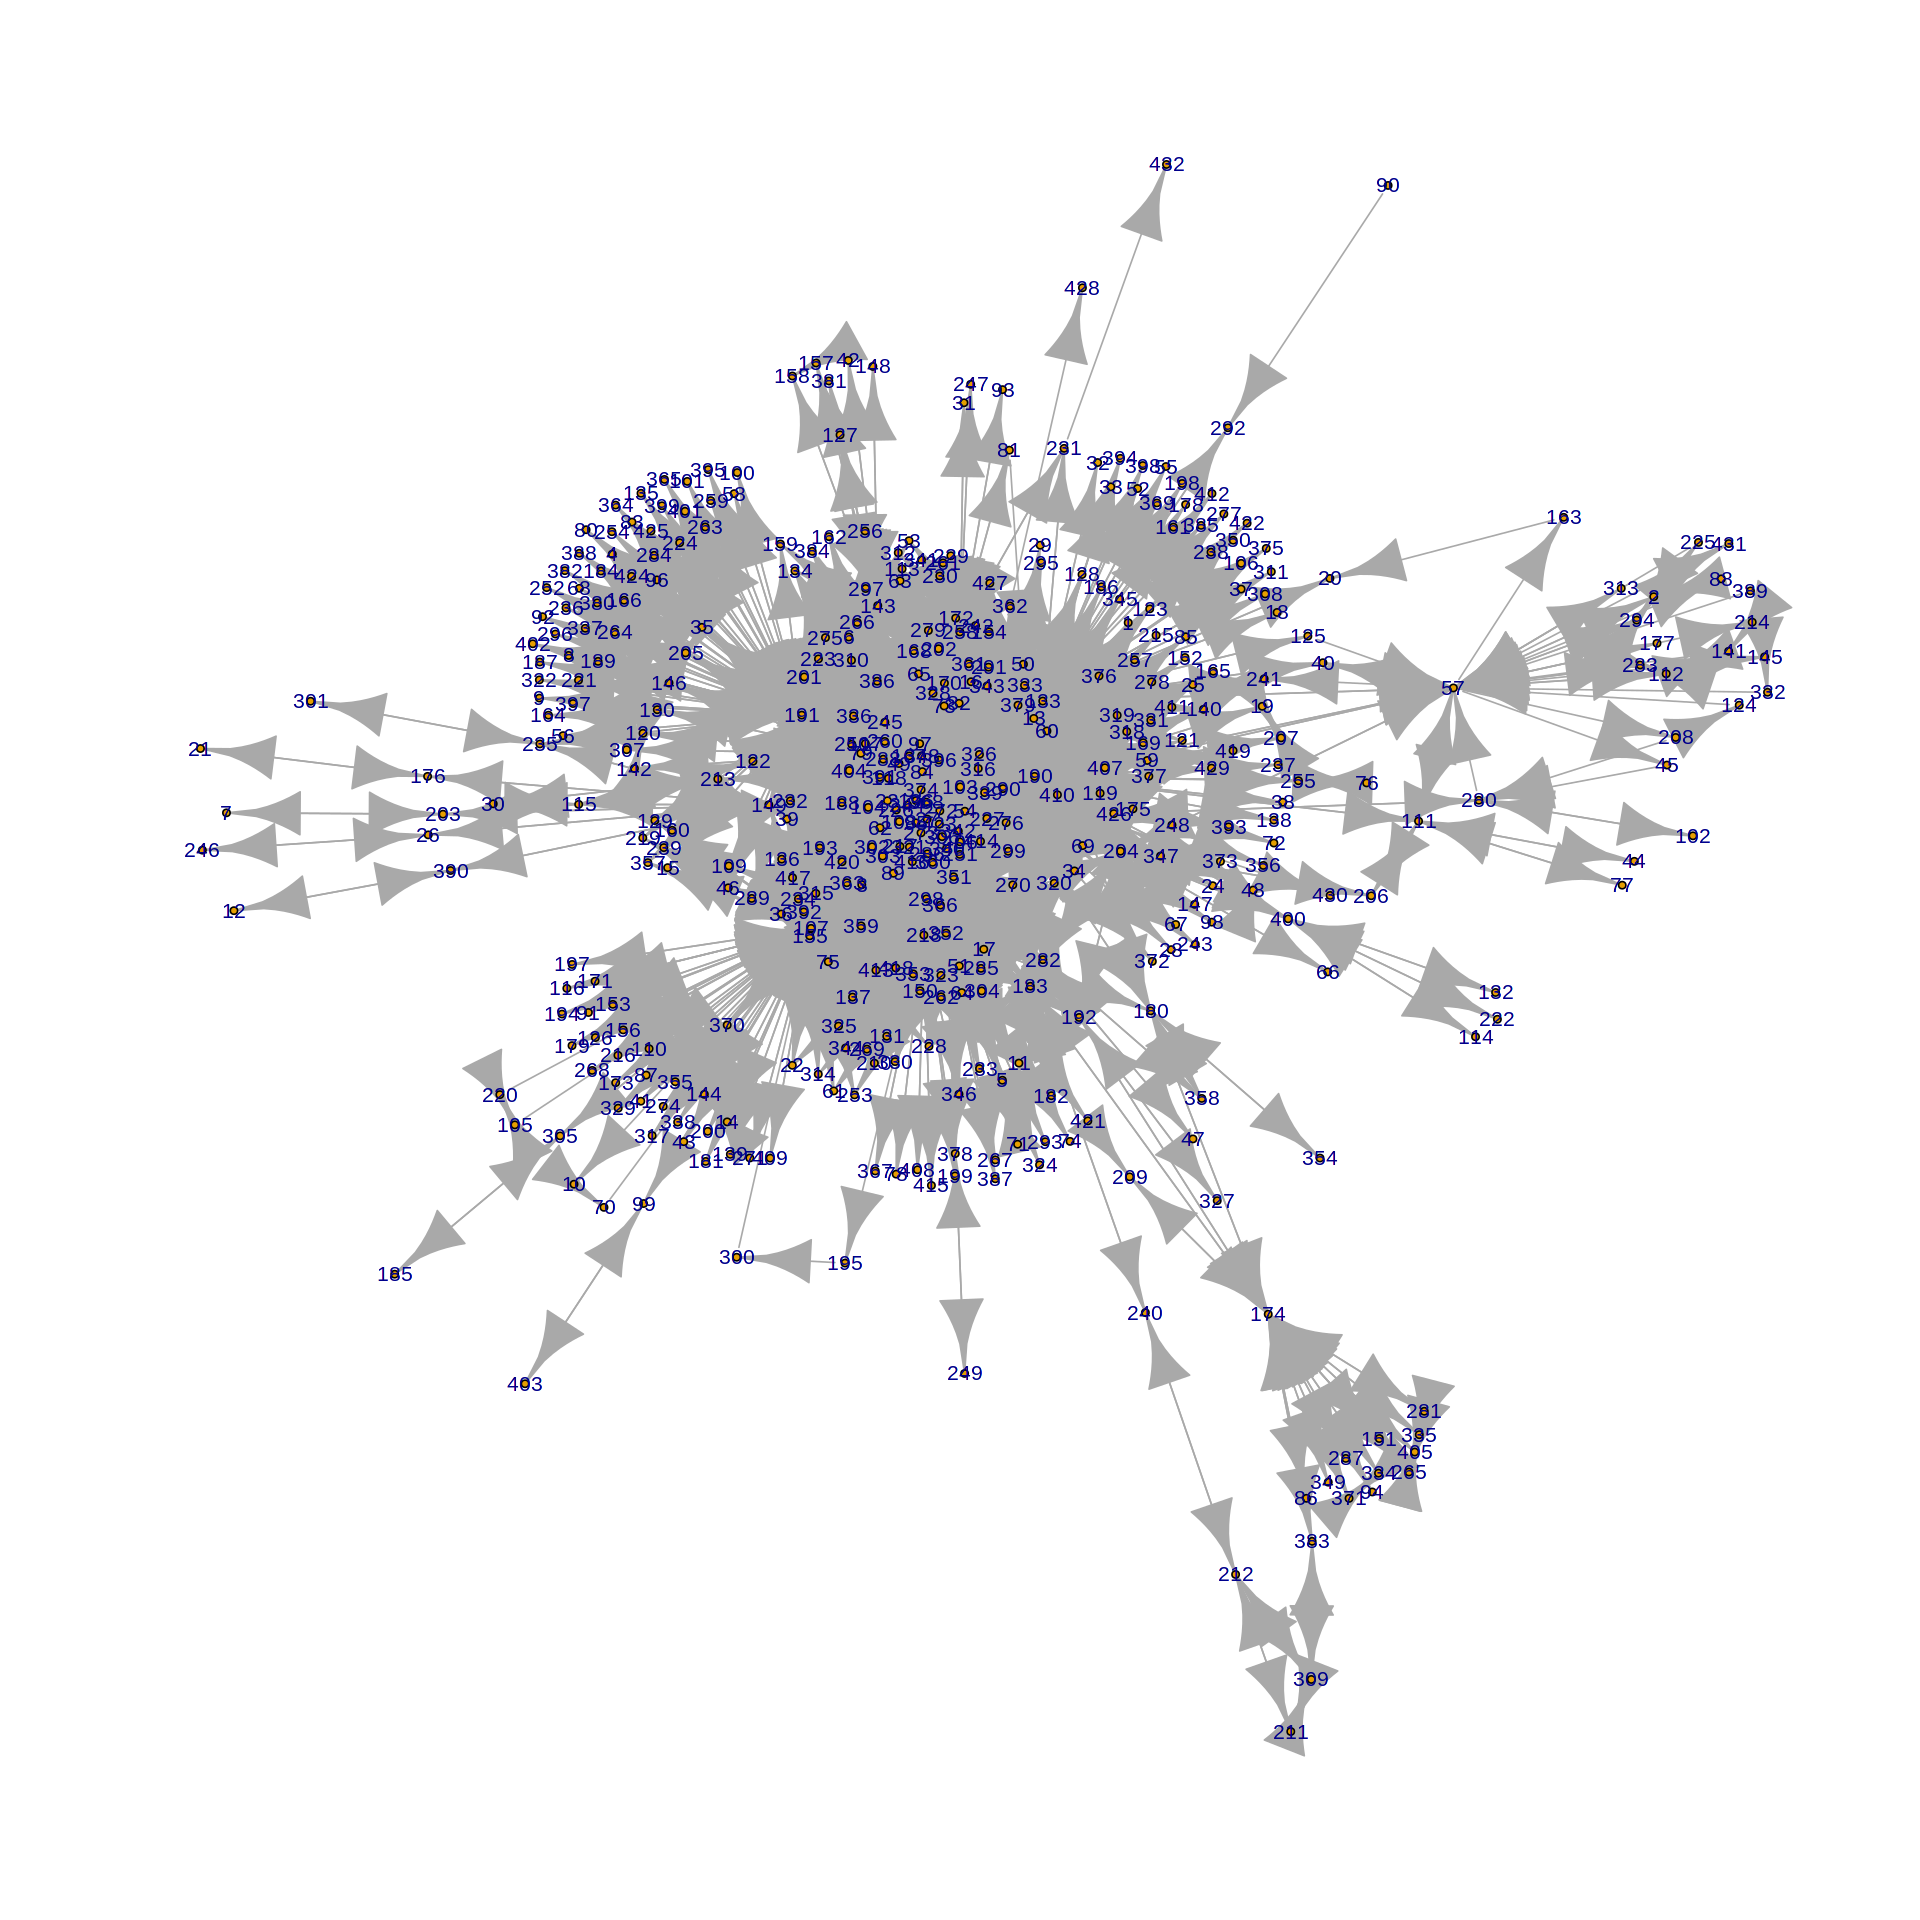

In [46]:
plot(as.directed(mynet), vertex.size=0.8, edge.size = 0.2)

### Hubs

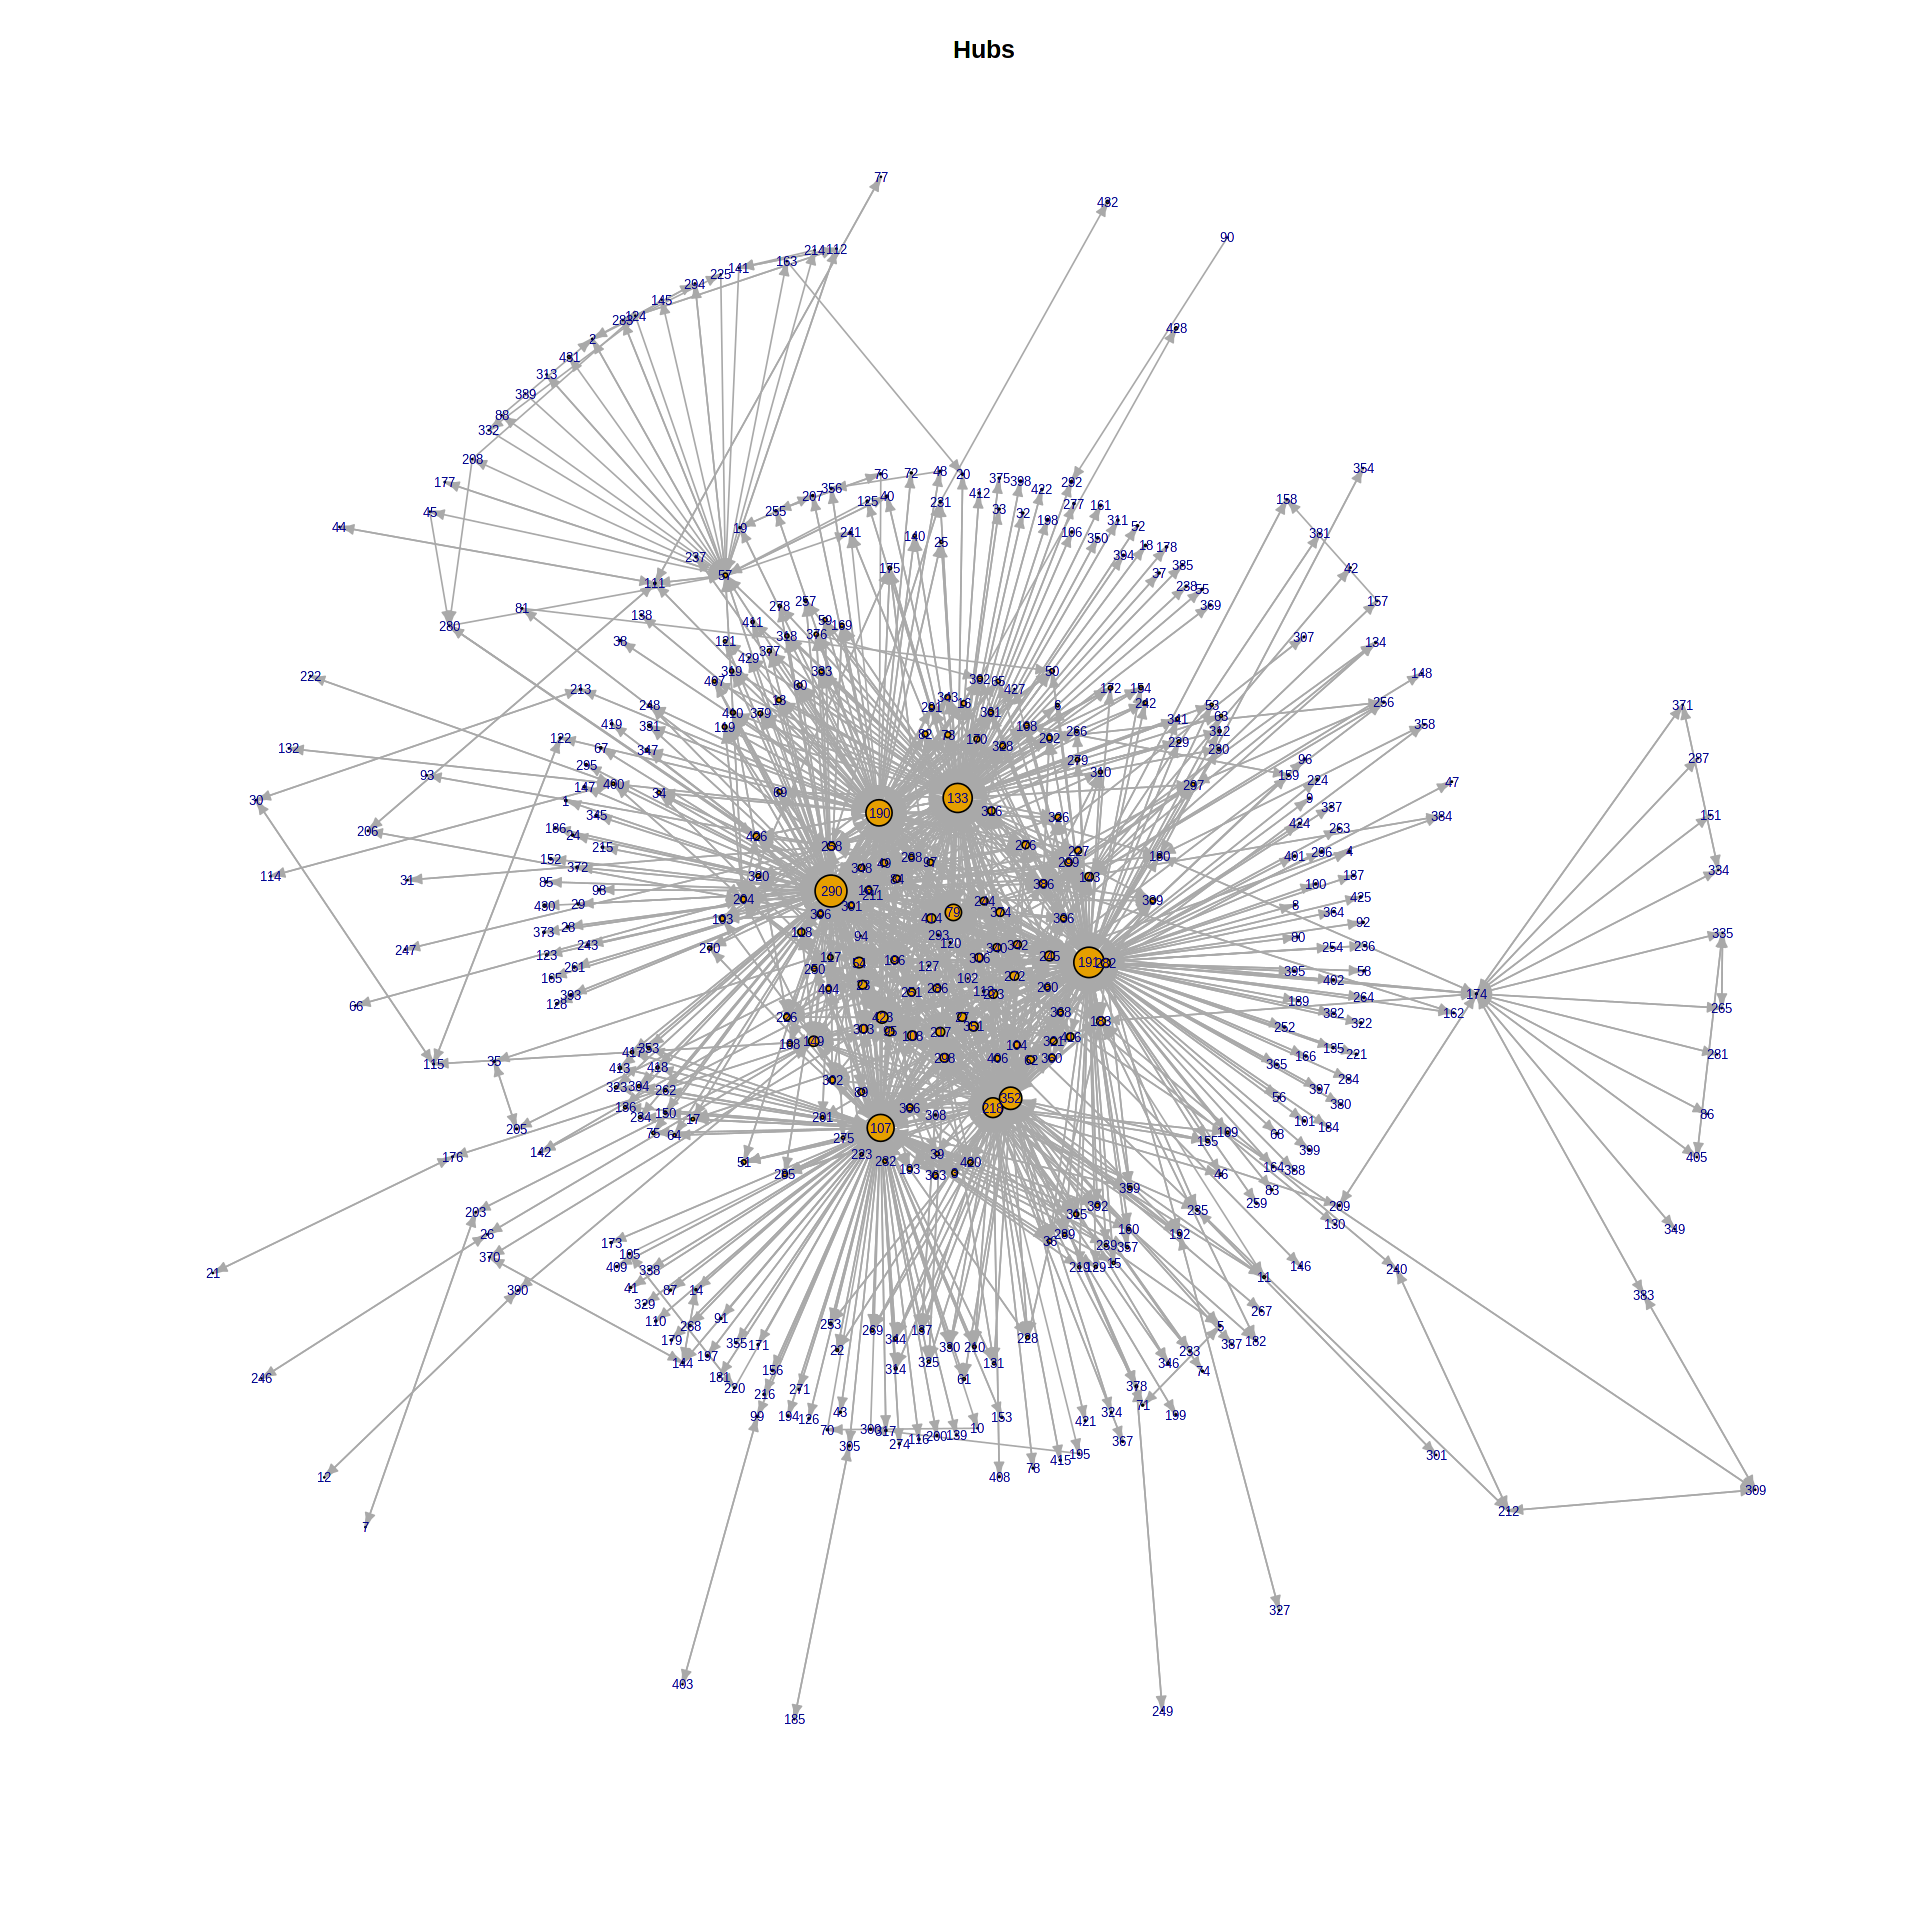

In [47]:
set.seed(11)

hs <- hub_score(mynet)$vector

plot(mynet, vertex.size=hs*4 ,main="Hubs",colors=rainbow(9),edge.arrow.size=0.2, vertex.label.cex = 0.6,
     layout=layout.kamada.kawai)

### Authority

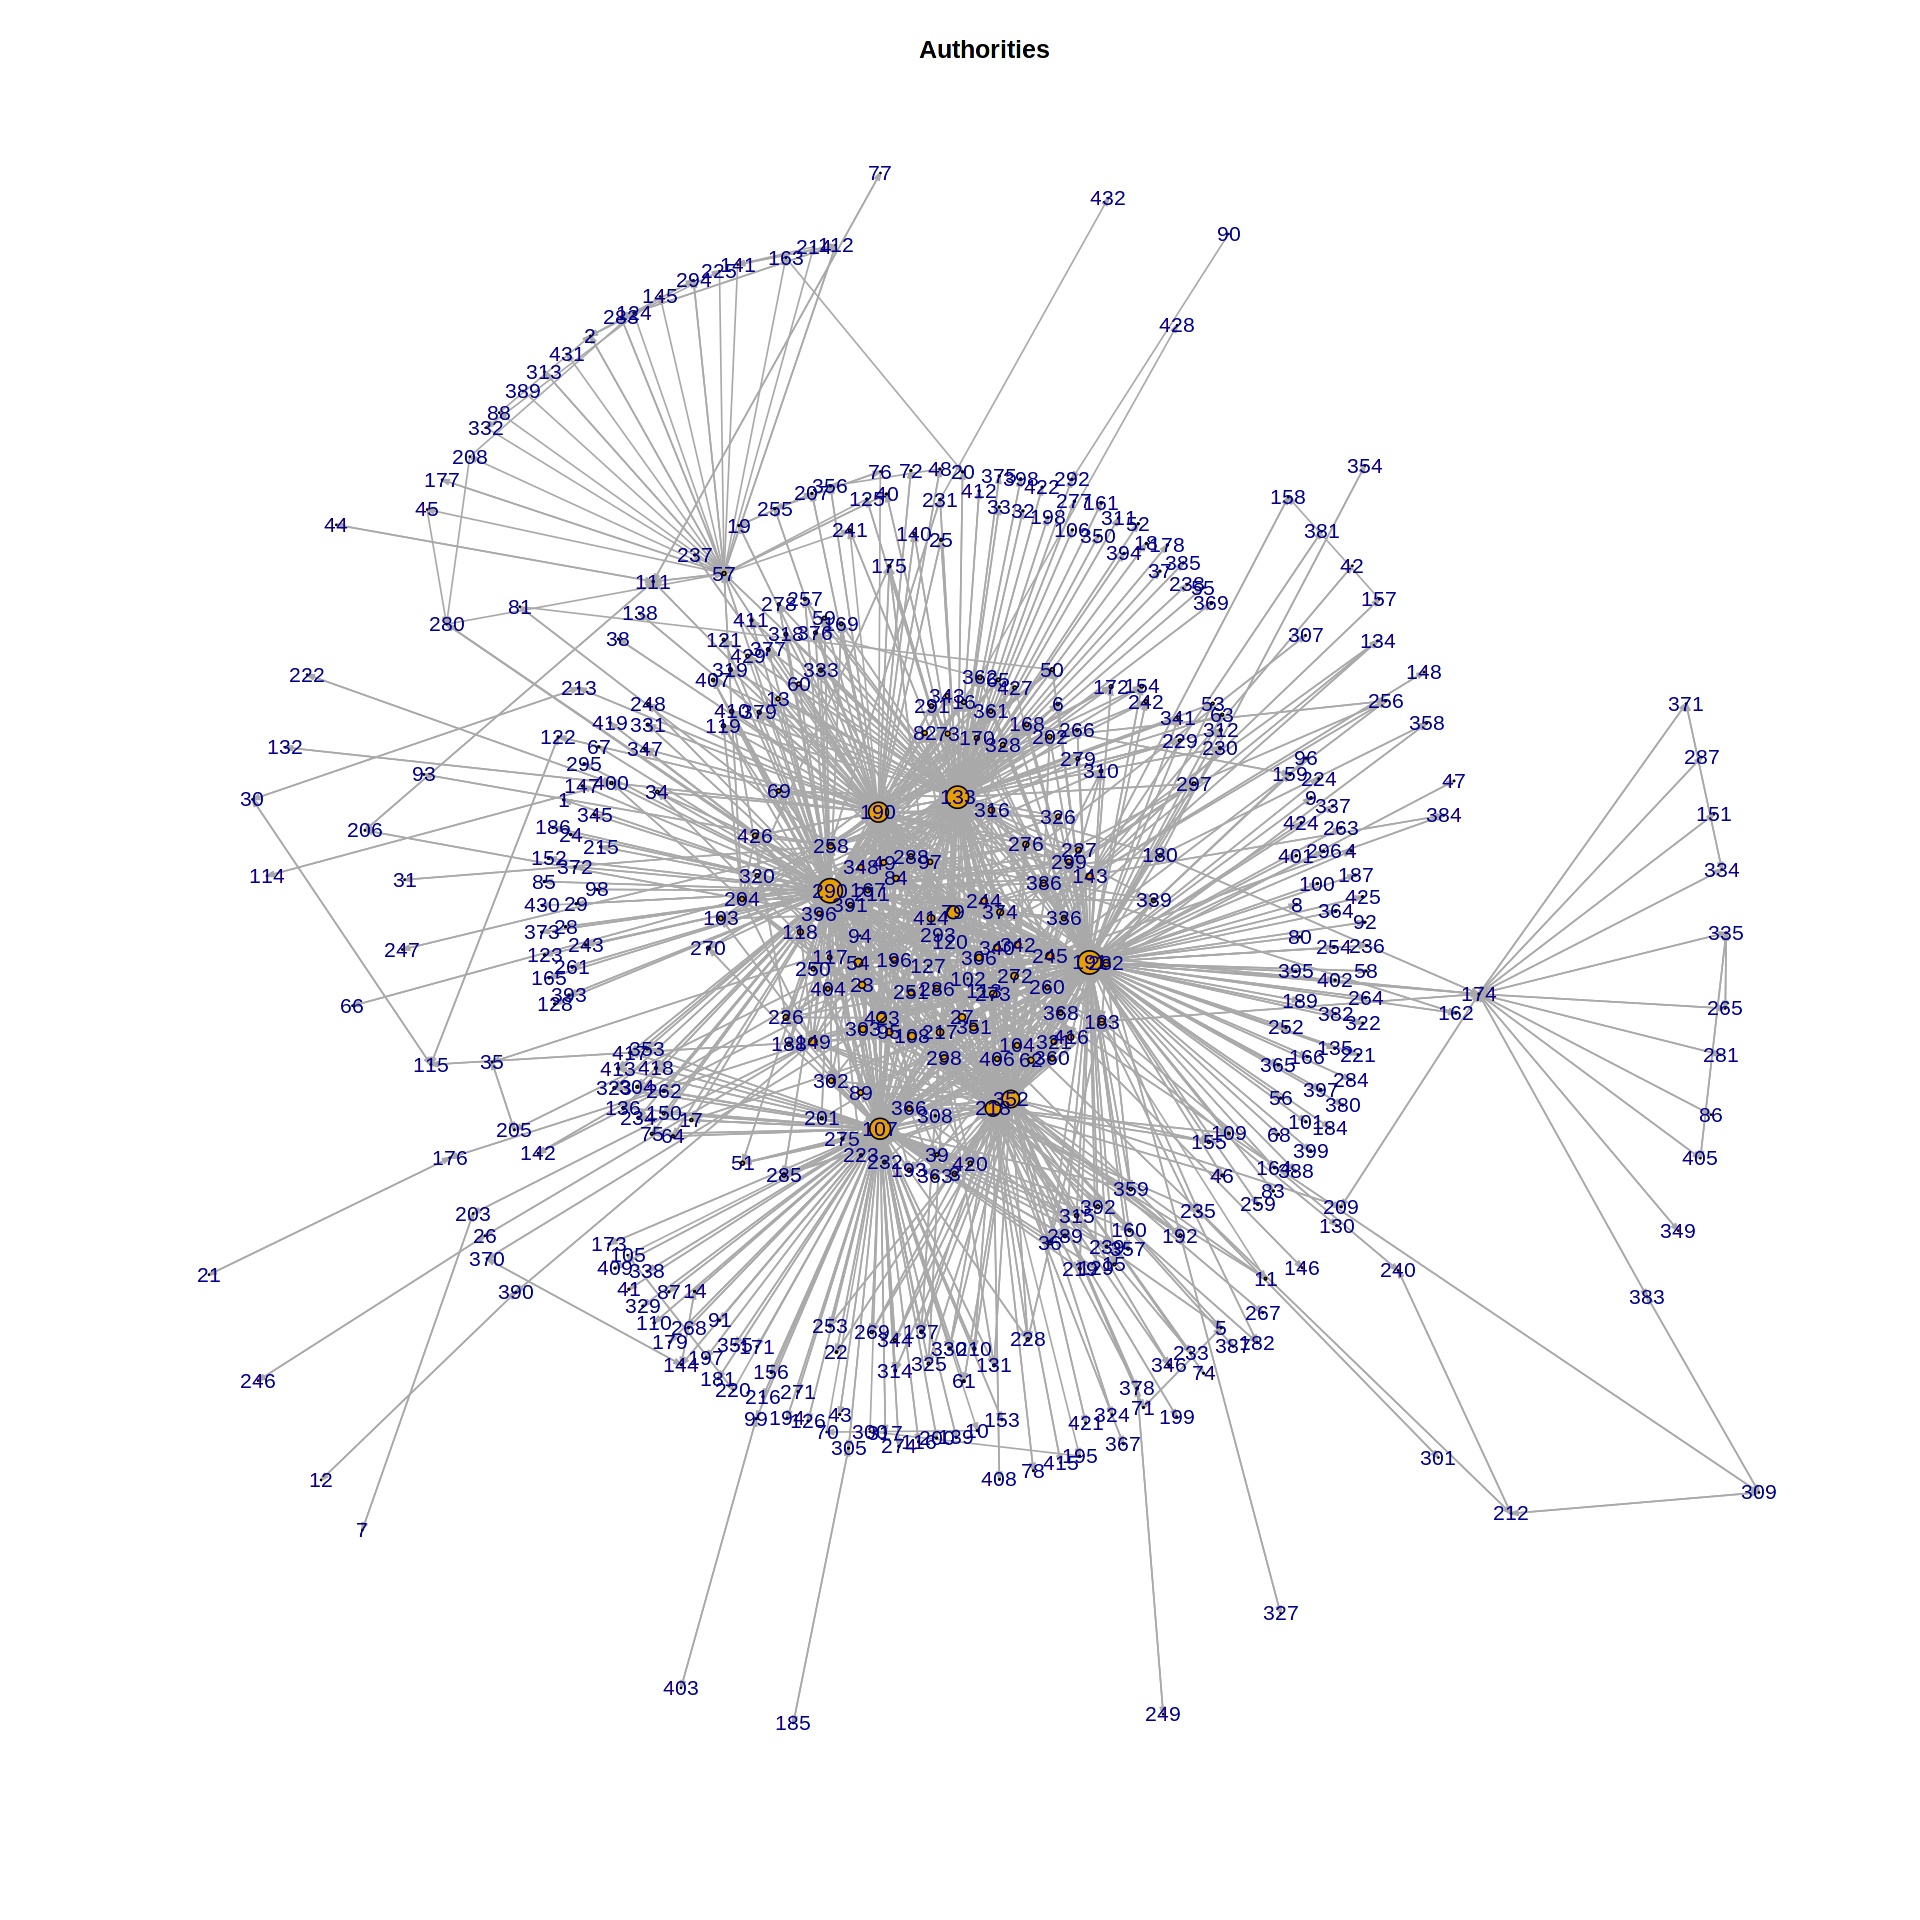

In [48]:
set.seed(11)

#shows more important nodes (derived from the number of connections/weights) but not hubs
au <- authority_score(mynet)$vector
plot(mynet, vertex.size=au * 3,main="Authorities",colors=rainbow(9),edge.arrow.size=0.1,
     layout=layout.kamada.kawai)

### Community

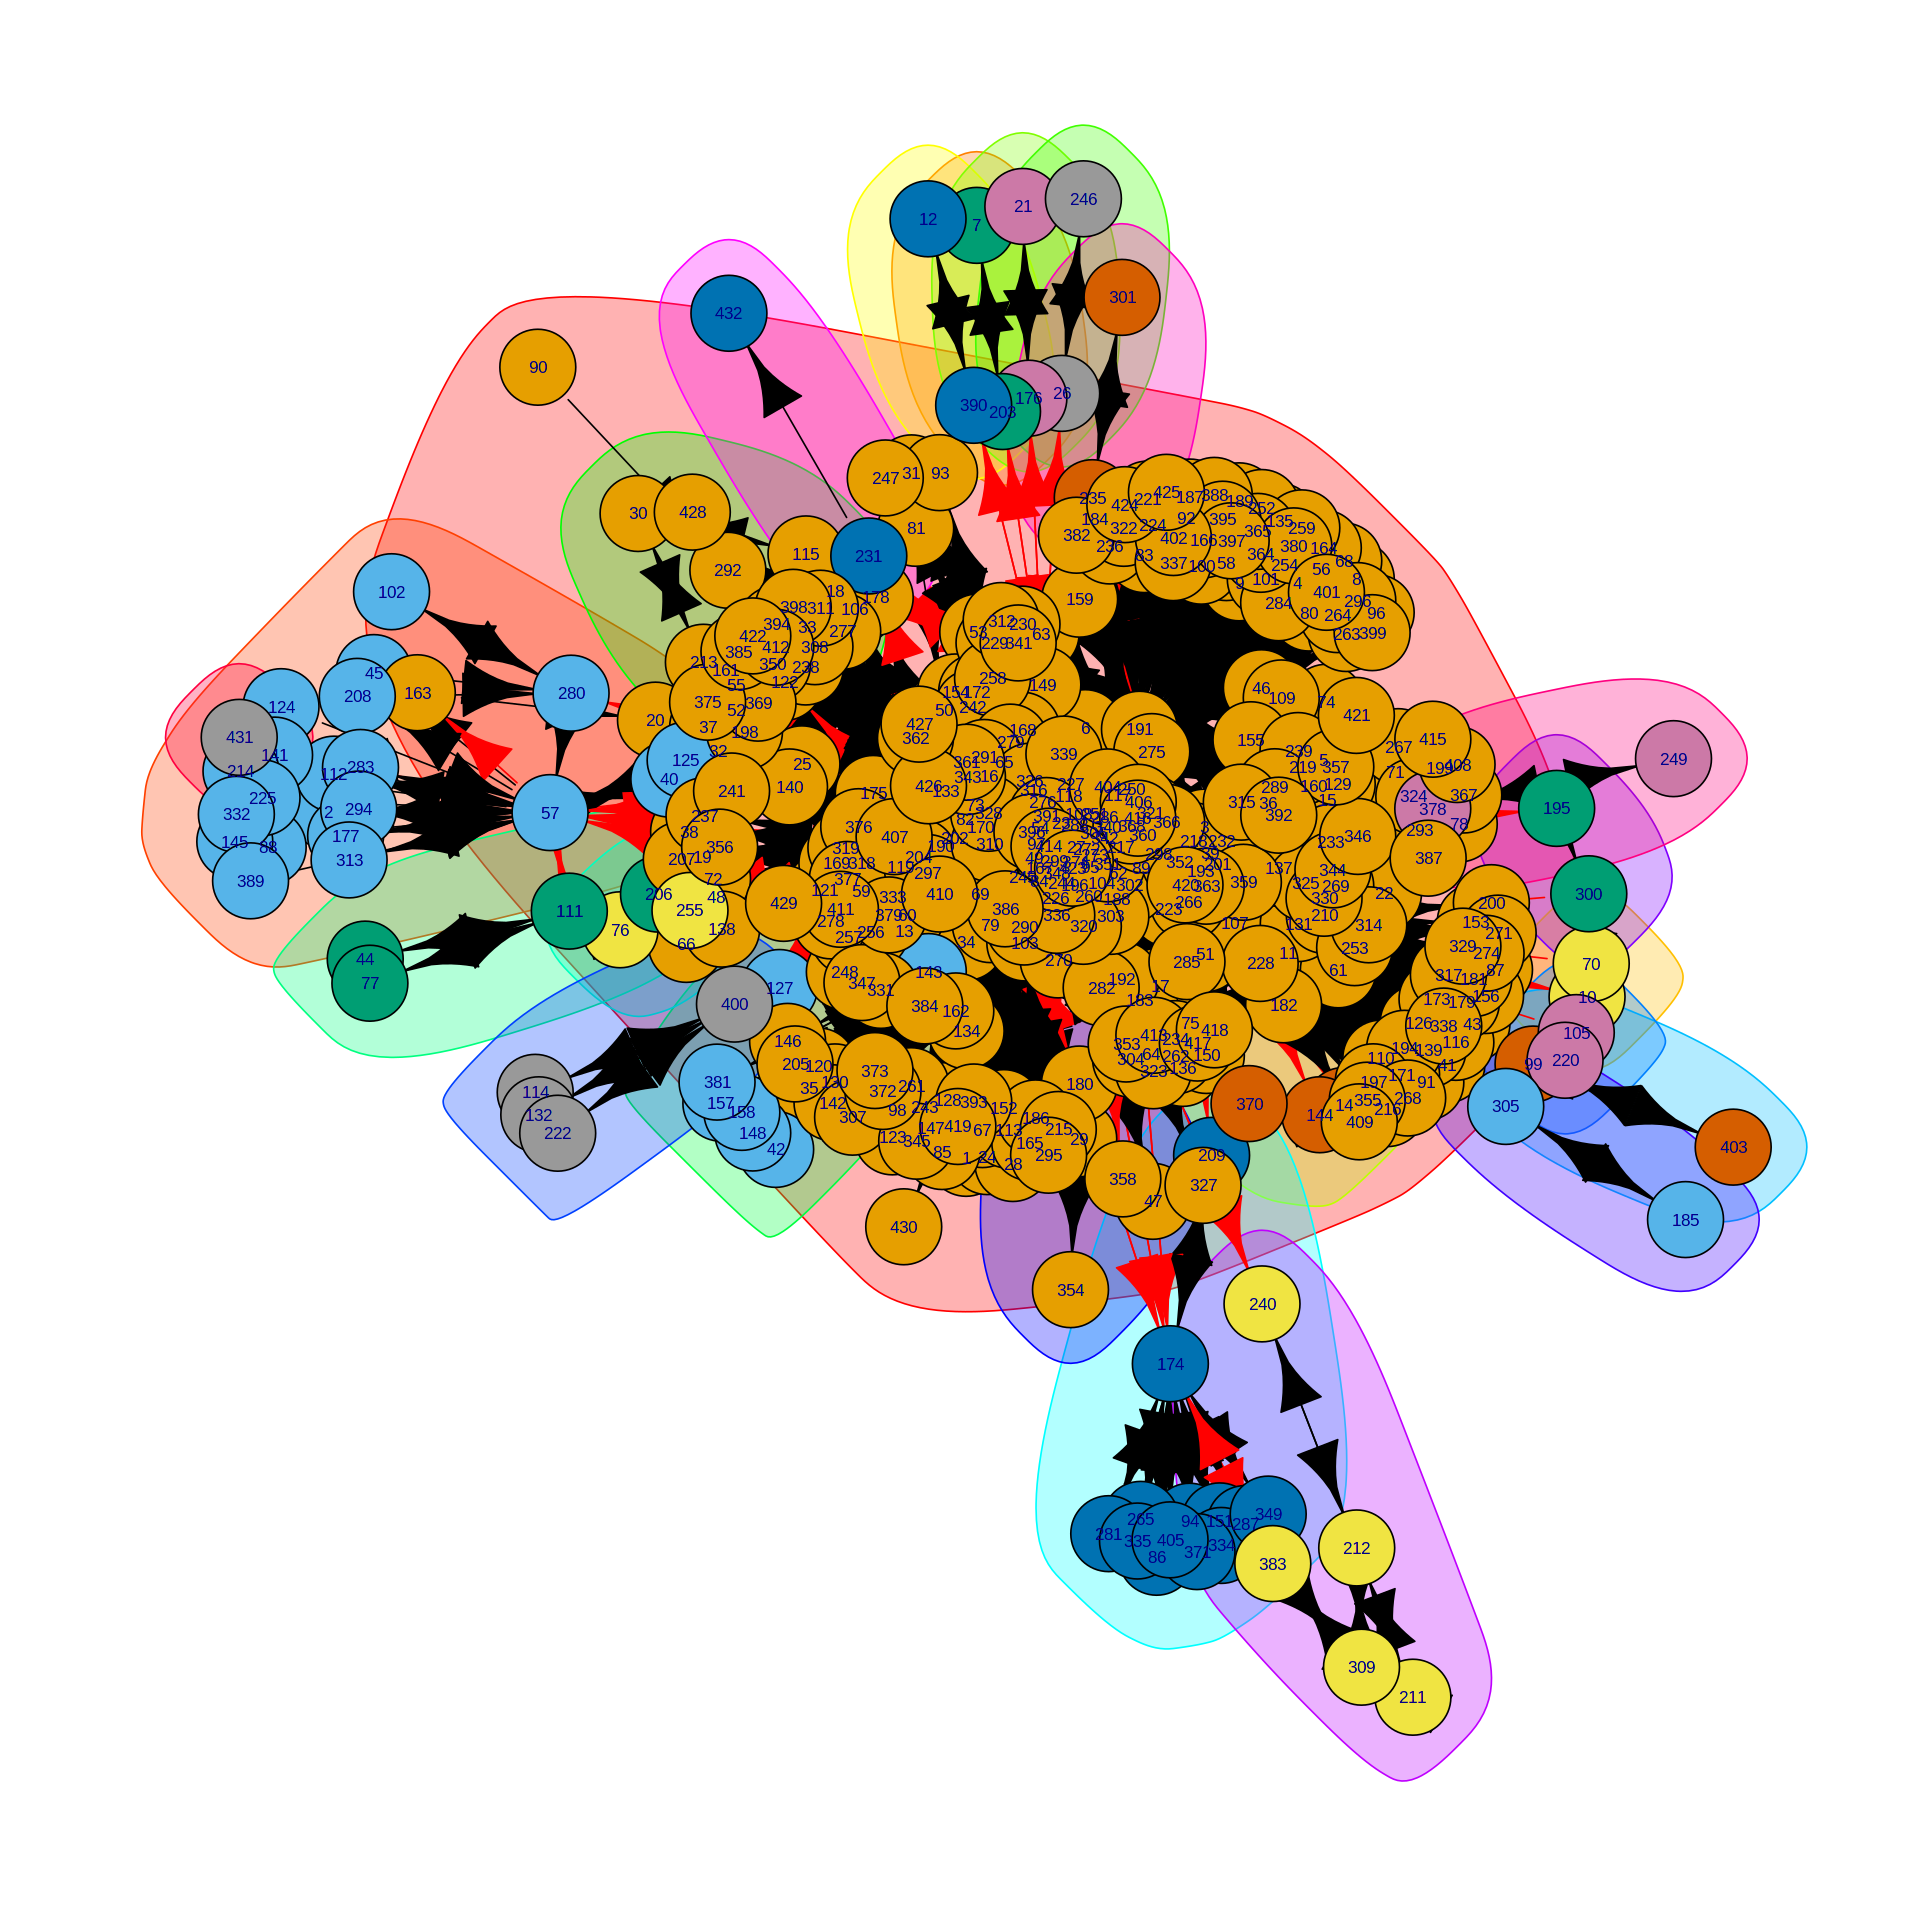

In [49]:
### community
cnet <- cluster_edge_betweenness(mynet)
plot(cnet, mynet, vertex.size=10, vertex.label.cex=0.8)

In [50]:
btwn <- cluster_edge_betweenness(mynet)
btwn

IGRAPH clustering edge betweenness, groups: 24, mod: 0.12
+ groups:
  $`1`
    [1]   1   3   4   5   6   8   9  11  13  15  16  17  18  19  20  22  23  24
   [19]  25  27  28  29  31  32  33  34  35  36  37  38  39  41  43  46  47  48
   [37]  49  50  51  52  53  54  55  56  58  59  60  61  62  63  64  65  66  67
   [55]  68  69  71  72  73  74  75  78  79  80  81  82  83  84  85  87  89  90
   [73]  91  92  93  95  96  97  98 100 101 103 104 106 107 108 109 110 113 116
   [91] 117 118 119 120 121 123 126 128 129 130 131 133 134 135 136 137 138 139
  [109] 140 142 146 147 149 150 152 153 154 155 156 159 160 161 162 163 164 165
  [127] 166 167 168 169 170 171 172 173 175 178 179 181 182 183 184 186 187 188
  [145] 189 190 191 192 193 194 196 197 198 199 200 201 202 204 205 207 210 215
  + ... omitted several groups/vertices

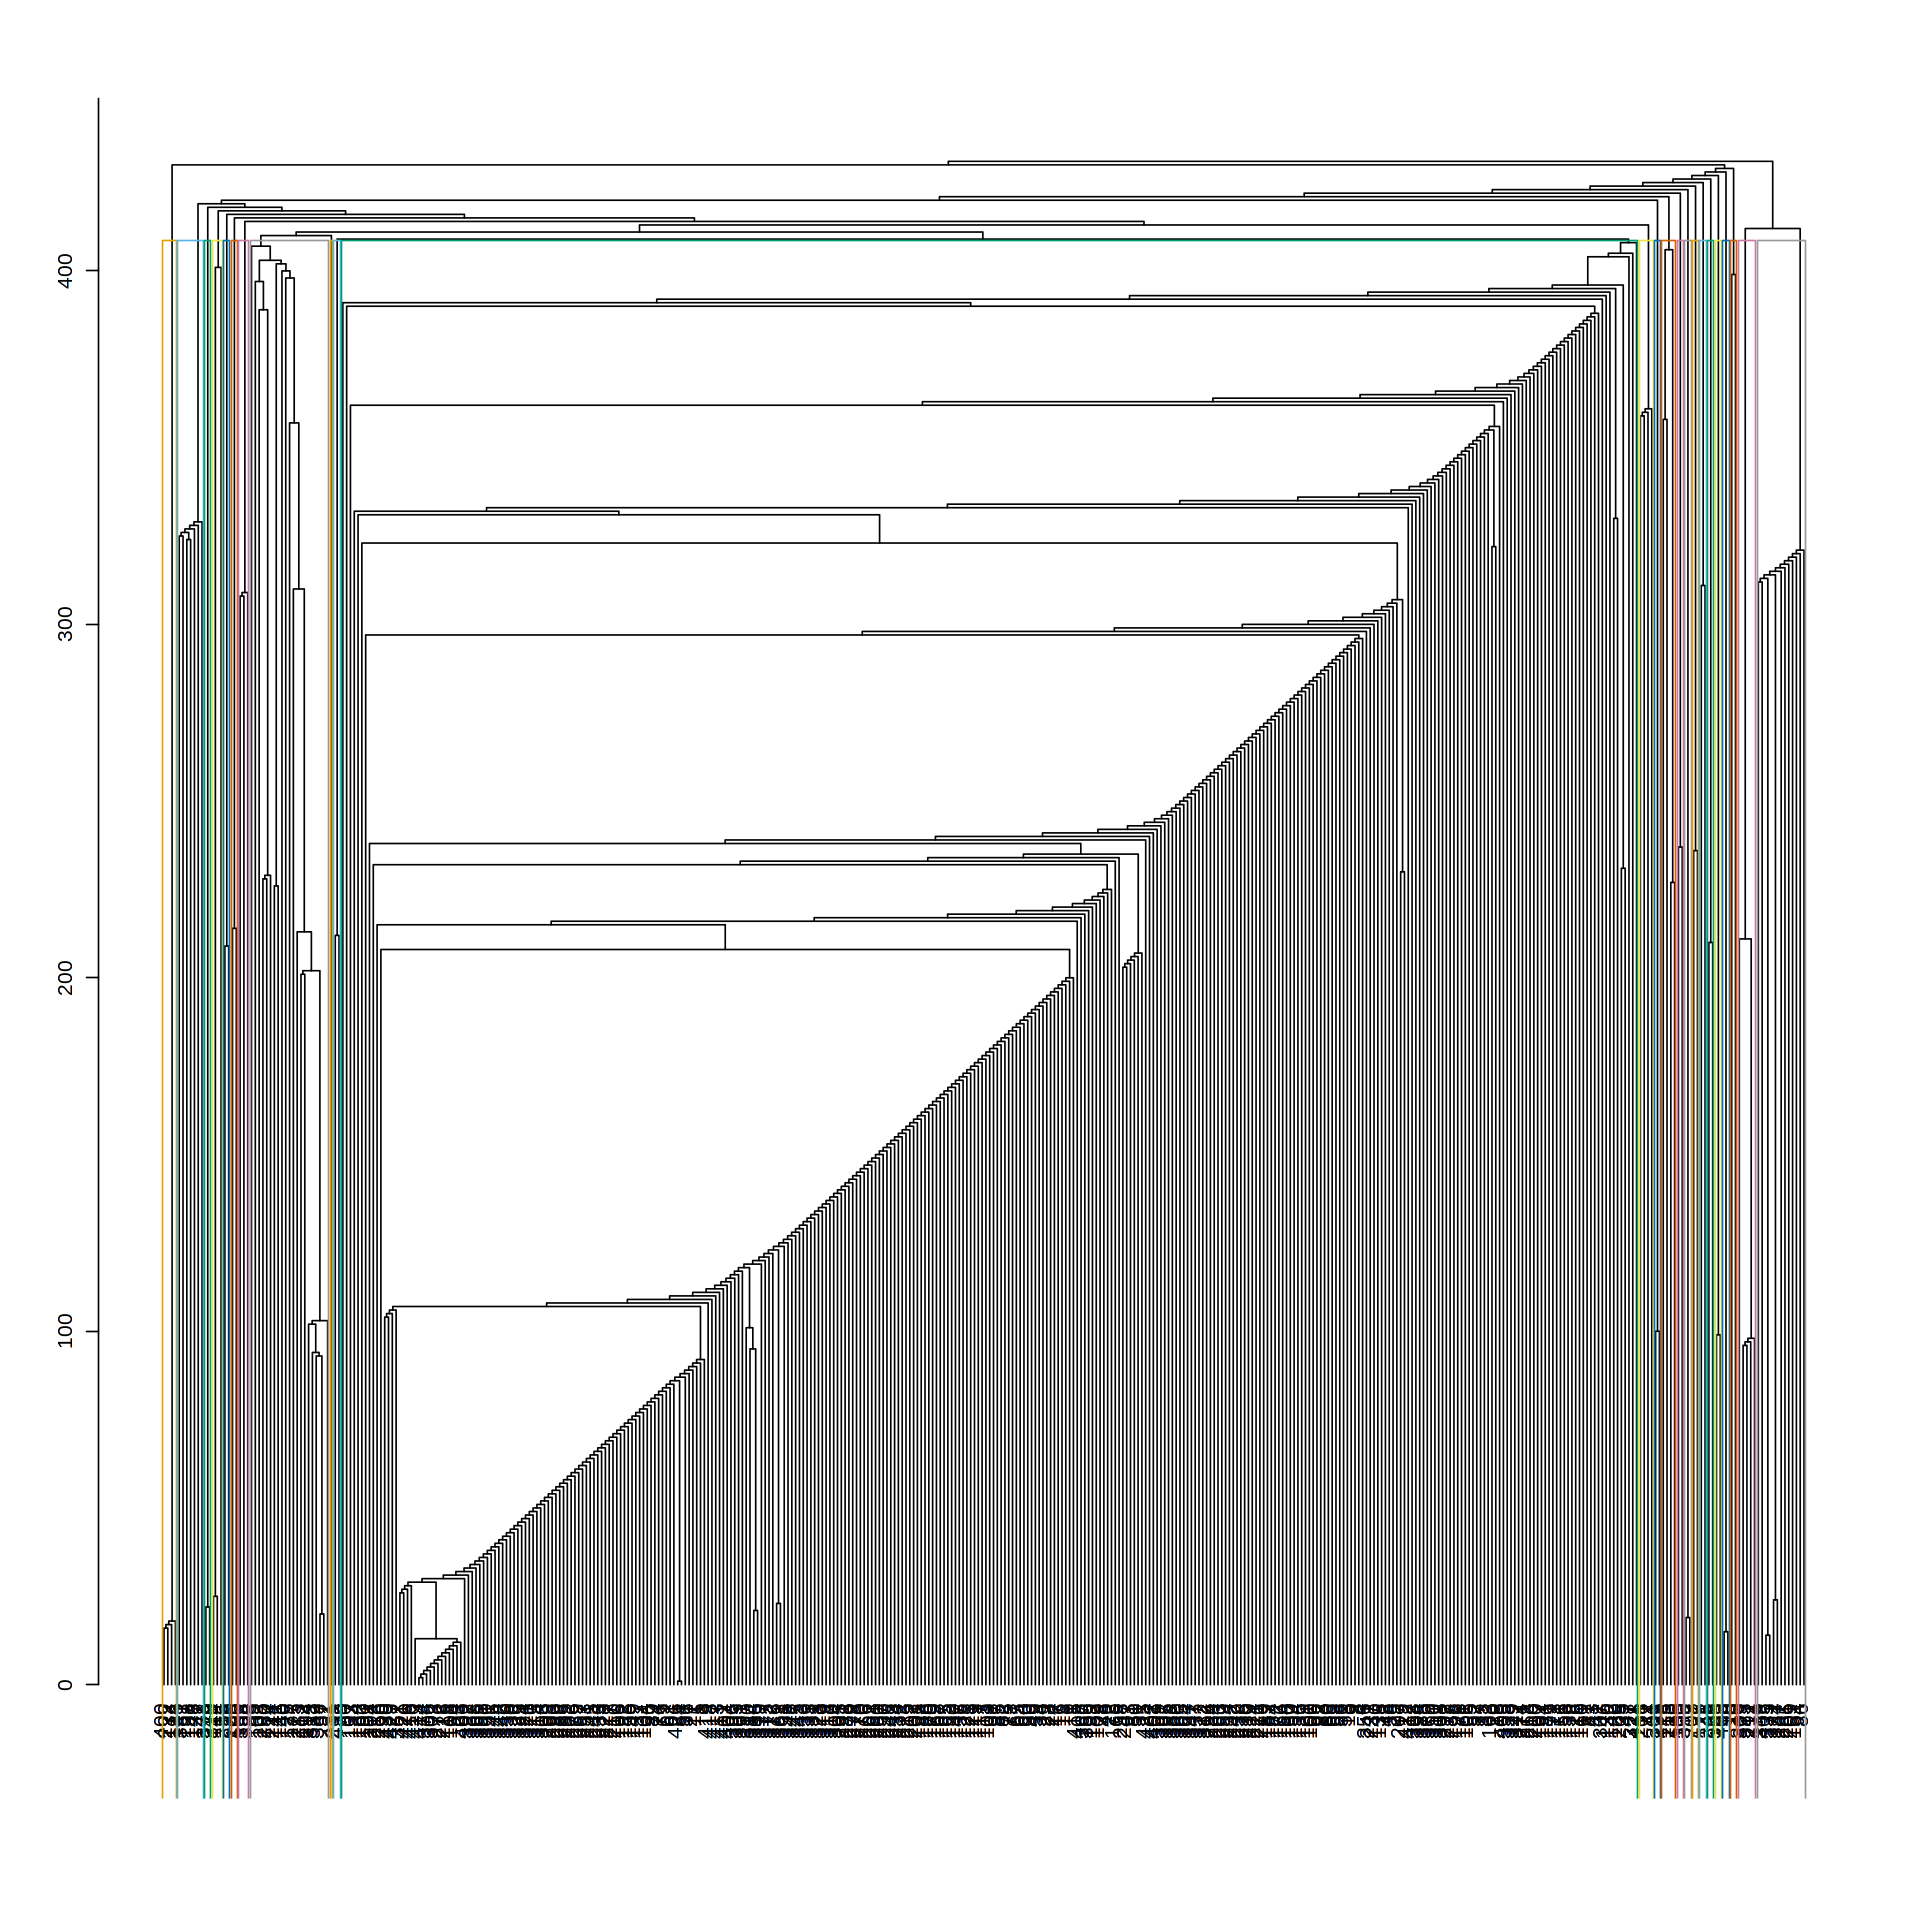

In [51]:
dendPlot(btwn, mode="hclust")

In [ ]:
length(btwn)






































In [ ]:
membership(btwn)